# Initial Dataset Exploration

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [38]:
df = pd.read_csv('../data/all_fares.csv')

In [4]:
print(df.shape)

(59, 6)


In [5]:
df.head()

,Month,Year,Average Uber Total Fare,Average Uber Base Fare,Average Lyft Total Fare,Average Lyft Base Fare
0,9,2019,22.552479,18.400790,23.765722,19.546145
1,10,2019,22.261952,18.084945,24.000383,19.731607
2,11,2019,20.479061,16.619653,24.091061,19.754347
3,12,2019,22.058820,18.073472,24.777690,20.379248
4,1,2020,20.586255,16.803977,22.742466,18.496016


In [39]:
# Create a Date field which appends the Month and Year and sets the Day to be 1 (this is just a dummy value)
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1)) 

# Set 'Date' as the index
df.set_index('Date', inplace=True)

## Base Passenger Fares
What is the distribution of base passenger fares between each service?

In [7]:
def fare_analysis(var, color):
    # Show statisitcs
    print(df[var].describe())

    # Create box plot
    df[var].plot.box(
        patch_artist=True,  # Enable custom colors
        boxprops=dict(facecolor=color, color='blue'),  # box
        medianprops=dict(color='red', linewidth=2),  # median line
        whiskerprops=dict(color='blue', linewidth=1.5),  # whiskers
        capprops=dict(color='blue', linewidth=1.5),  # caps
        flierprops=dict(marker='o', color='orange', alpha=0.5),  # outliers
    )

    plt.title(f"{var} Distribution", fontsize=14, fontweight='bold')
    plt.ylabel('Average Fares')

    # Customizing the grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    # Adding some padding
    plt.tight_layout()

    plt.show()

    # Create a kernel density plot for the compound score
    sns.kdeplot(df[var], 
                color=color,  # Set line color
                fill=True,  # Fill under the KDE curve
                alpha=0.4,  # Transparency of the fill
                linewidth=2)  # Thickness of the line

    # Add title and labels
    plt.title(f"{var} Density", fontsize=14, fontweight='bold')
    plt.xlabel('Average Fares')  # X-axis label
    plt.ylabel('Density')  # Y-axis label

    # Add a grid with custom style
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    # Improve layout
    plt.tight_layout()

    # Display the plot
    plt.show()

    # Plot as a time series
    df[var].plot(kind='line', color=color, marker='o')

    # Show the plot
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.title(f'{var} Over Time', fontsize=14, fontweight='bold')
    plt.grid(True)
    plt.show()

count    59.000000
mean     22.246817
std       3.653526
min      15.598487
25%      18.572378
50%      23.356943
75%      25.190381
max      27.307561
Name: Average Uber Base Fare, dtype: float64


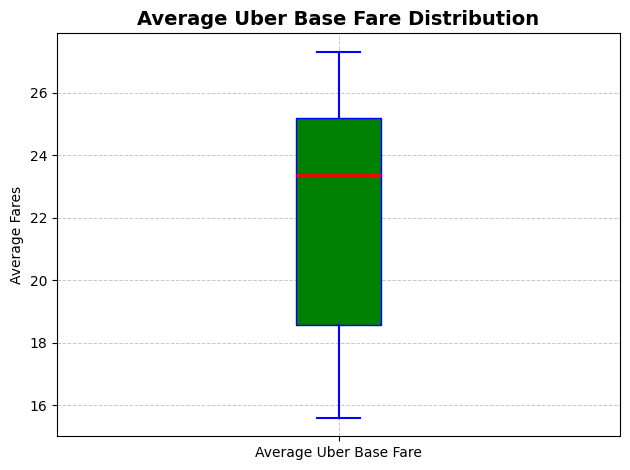

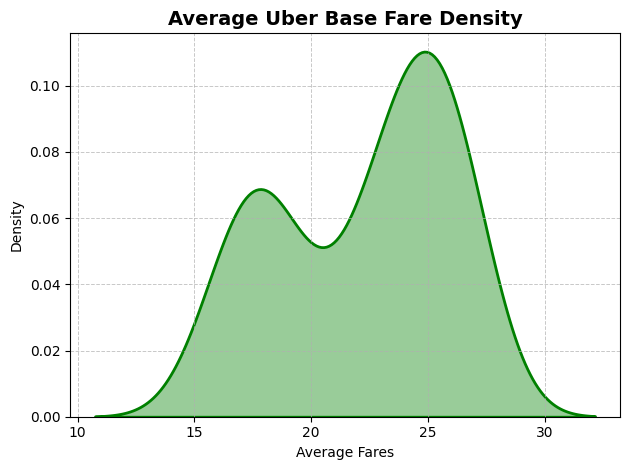

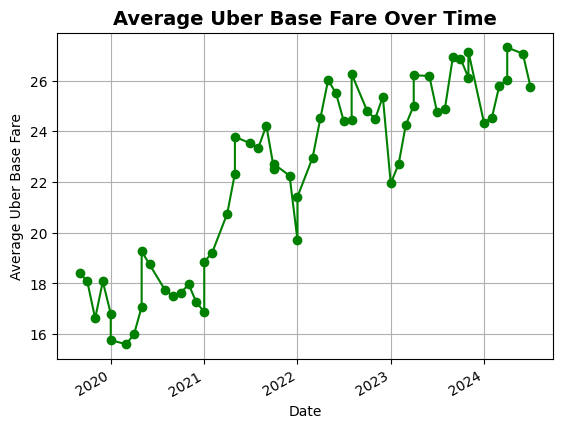

In [8]:
fare_analysis('Average Uber Base Fare', 'green')

count    59.000000
mean     21.836076
std       2.238637
min      17.198173
25%      19.742977
50%      22.440240
75%      23.527349
max      26.813416
Name: Average Lyft Base Fare, dtype: float64


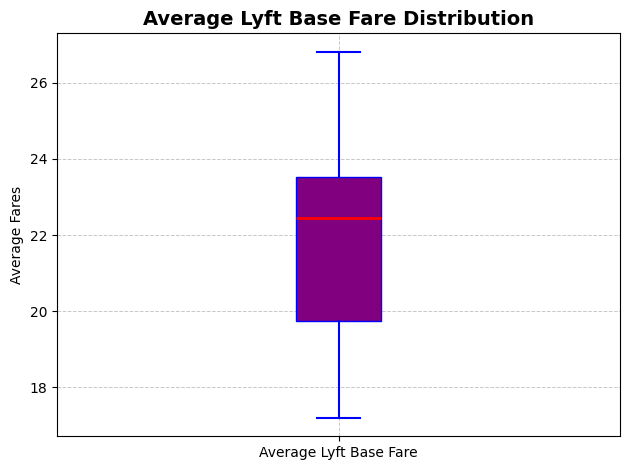

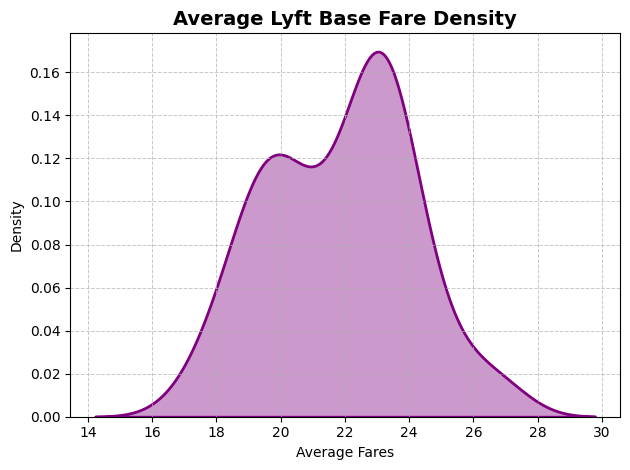

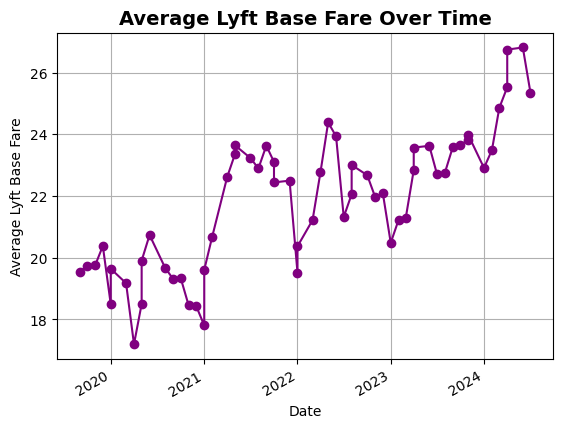

In [9]:
fare_analysis('Average Lyft Base Fare', 'purple')

## Average Total Fares
What is the distribution of average total fares between each service?

count    59.000000
mean     27.151899
std       4.606094
min      18.837074
25%      22.395033
50%      28.452702
75%      31.019634
max      33.286359
Name: Average Uber Total Fare, dtype: float64


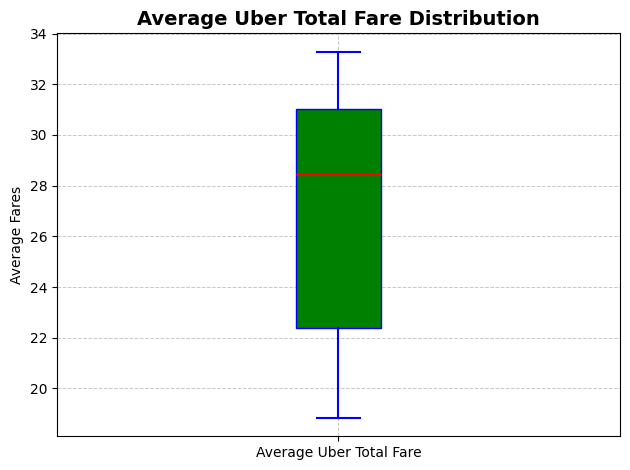

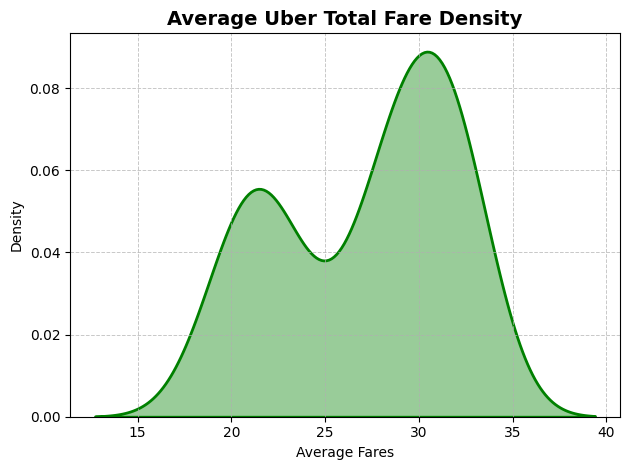

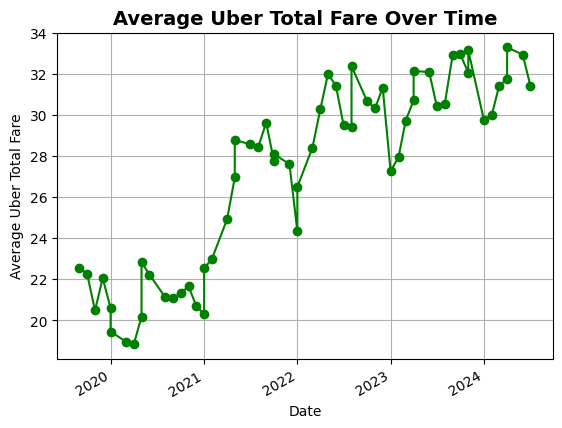

In [10]:
fare_analysis('Average Uber Total Fare', 'green')

count    59.000000
mean     26.815115
std       2.884389
min      20.644632
25%      24.060749
50%      27.558850
75%      28.912711
max      32.955595
Name: Average Lyft Total Fare, dtype: float64


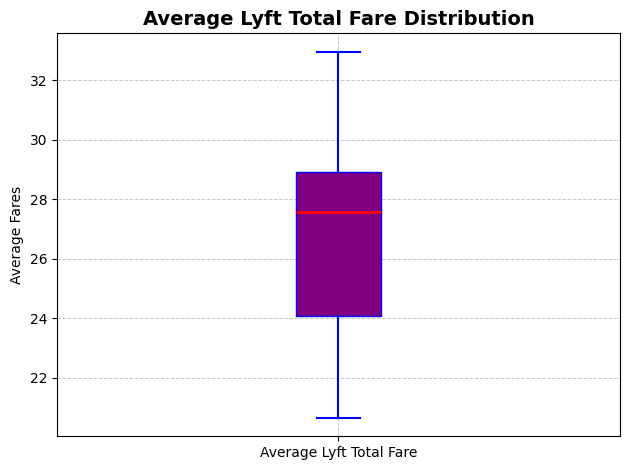

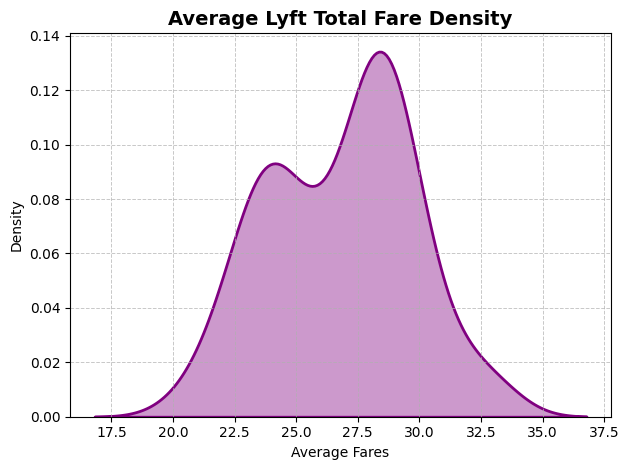

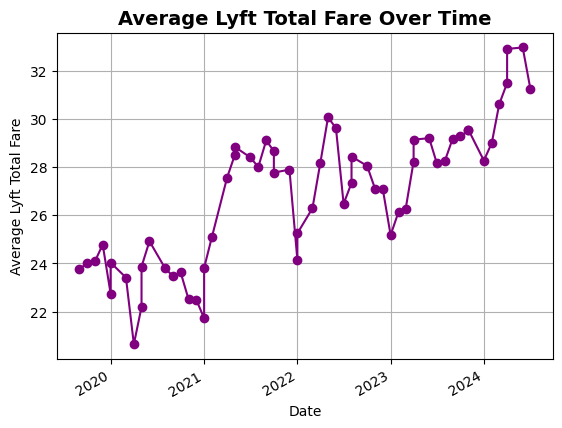

In [11]:
fare_analysis('Average Lyft Total Fare', 'purple')

## Monthly Distribution
Were there months when the average total ride fare for each service was unusually higher or lower?

In [12]:
def monthyear_analysis(month_year, var, color):
    print(df.groupby(month_year)[var].describe())

    ax = df.groupby(month_year)[var].median().plot.bar(color=color)

    if month_year == "Month":
        labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
        ax.set_xticklabels(labels)

    plt.title(f"{month_year}ly Median of {var}", fontsize=14, fontweight='bold')
    plt.ylabel(f'{month_year}ly Median of Average Fares')

    # Adding some padding
    plt.tight_layout()

    plt.show()

       count       mean       std        min        25%        50%        75%  \
Month                                                                           
1        8.0  23.839845  3.746067  19.451959  20.513069  23.434498  26.685656   
2        3.0  26.984304  3.595912  23.006290  25.474501  27.942712  28.973311   
3        4.0  27.129772  5.584968  18.959220  26.048039  29.067764  30.149496   
4        7.0  28.847630  5.165574  18.837074  27.605688  30.709522  31.944540   
5        5.0  26.152417  4.703989  20.184708  22.829225  26.956117  28.785017   
6        4.0  29.667774  4.999071  22.228205  29.115675  31.750572  32.302671   
7        4.0  29.977564  1.225291  28.569768  29.266100  29.956772  30.668235   
8        5.0  28.380520  4.304717  21.136962  28.452702  29.396916  30.543391   
9        4.0  26.542057  5.663442  21.062688  22.180031  26.088896  30.450921   
10       6.0  27.177286  4.587563  21.315886  23.638048  27.932603  30.029725   
11       5.0  27.531347  6.0

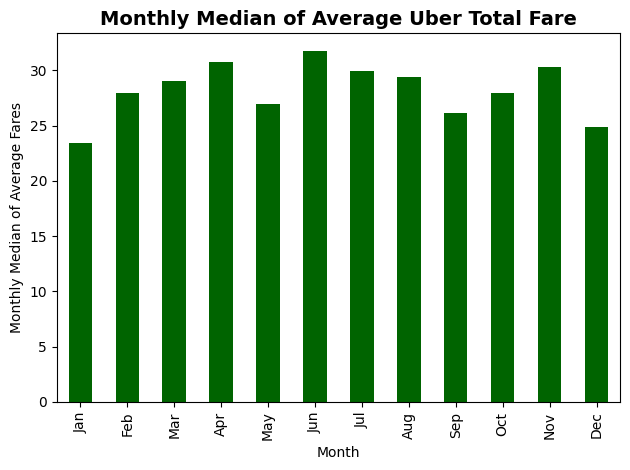

In [13]:
monthyear_analysis("Month", "Average Uber Total Fare", "darkgreen")

       count       mean       std        min        25%        50%        75%  \
Month                                                                           
1        8.0  24.391971  1.953264  21.720957  23.545712  24.090337  25.189231   
2        3.0  26.746081  2.010683  25.112940  25.623218  26.133497  27.562652   
3        4.0  26.640124  2.963893  23.411243  25.553311  26.275761  27.362574   
4        7.0  28.301613  3.896843  20.644632  27.867358  28.222153  30.306813   
5        5.0  26.685485  3.443277  22.188020  23.861090  28.490683  28.833616   
6        4.0  29.169446  3.297376  24.916730  28.123290  29.402729  30.448886   
7        4.0  28.563137  1.980530  26.470187  27.727283  28.269442  29.105296   
8        5.0  27.159963  1.922264  23.802447  27.331401  27.997163  28.238053   
9        4.0  26.374957  3.191278  23.461226  23.689598  26.430912  29.116271   
10       6.0  26.893586  2.443649  23.628802  24.941340  27.903486  28.503497   
11       5.0  26.552195  3.1

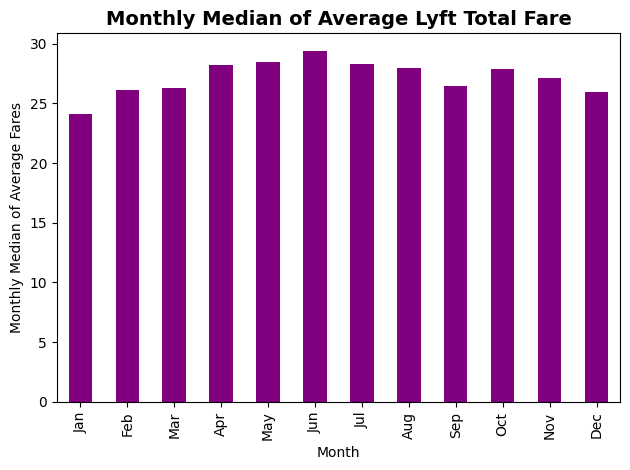

In [14]:
monthyear_analysis("Month", "Average Lyft Total Fare", "purple")

## Yearly Distribution
Were there years when the average total ride fare for each service was unusually higher or lower?

      count       mean       std        min        25%        50%        75%  \
Year                                                                           
2019    4.0  21.838078  0.928384  20.479061  21.663880  22.160386  22.334584   
2020   12.0  20.746100  1.235380  18.837074  20.001521  20.886055  21.399814   
2021   12.0  26.384323  2.977168  20.293511  24.445065  27.685759  28.481968   
2022   12.0  29.711975  2.345440  24.340883  29.150432  30.303726  31.350184   
2023   12.0  30.991917  1.938635  27.257554  30.242636  31.383225  32.336847   
2024    7.0  31.513994  1.328434  29.765457  30.714126  31.426943  32.345472   

            max  
Year             
2019  22.552479  
2020  22.829225  
2021  29.625312  
2022  32.372629  
2023  33.148415  
2024  33.286359  


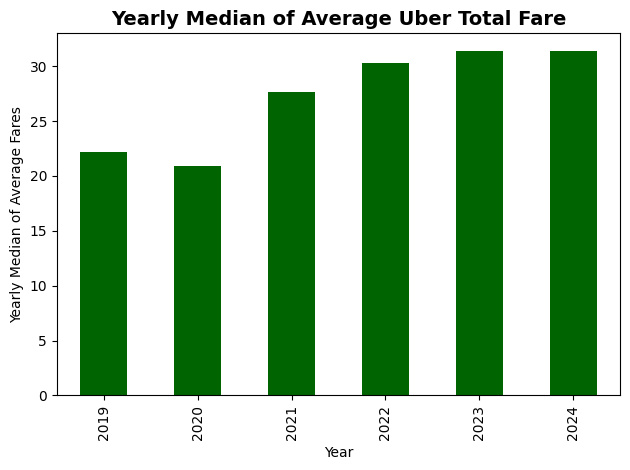

In [15]:
monthyear_analysis("Year", "Average Uber Total Fare", "darkgreen")

      count       mean       std        min        25%        50%        75%  \
Year                                                                           
2019    4.0  24.158714  0.434825  23.765722  23.941718  24.045722  24.262718   
2020   12.0  23.141180  1.104764  20.644632  22.506633  23.436235  23.817108   
2021   12.0  27.110427  2.311599  21.720957  26.947373  27.942328  28.532282   
2022   12.0  27.332963  1.691643  24.150237  26.423687  27.217498  28.239588   
2023   12.0  28.167641  1.497403  25.171665  27.676570  28.685323  29.211178   
2024    7.0  30.918631  1.795417  28.264610  29.794769  31.243477  32.188598   

            max  
Year             
2019  24.777690  
2020  24.916730  
2021  29.096101  
2022  30.054018  
2023  29.551461  
2024  32.955595  


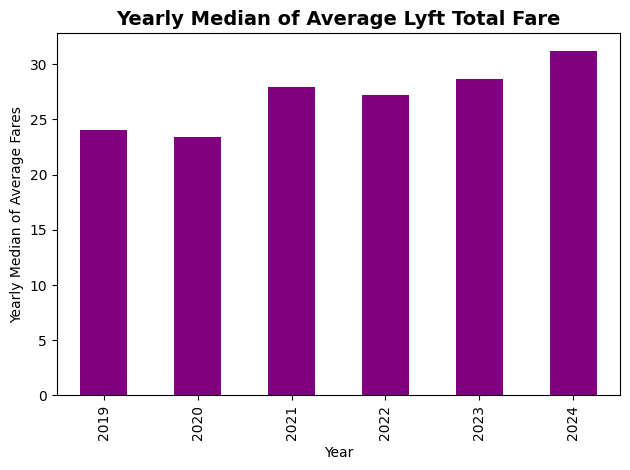

In [16]:
monthyear_analysis("Year", "Average Lyft Total Fare", "purple")

# Linear Regression

In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime as dt

In [36]:
# reset index so that Date is a column
df = df.reset_index()

In [46]:
df['Date'] = df['Date'].map(dt.datetime.toordinal)

In [47]:
# convert the timeseries data into numpy arrays
x = np.array(df[["Average Lyft Total Fare", "Date"]])
y = np.array(df["Average Uber Total Fare"])

In [48]:
# create and fit the linear regression model
model = LinearRegression().fit(x, y)

In [49]:
# find the R^2 value
rsq = model.score(x, y)
print(f"coefficient of determination: {rsq}")

coefficient of determination: 0.9015808632402103


In [50]:
# find the intercept and slope of the model
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: -2909.324487453679
slope: [0.87666381 0.00394615]


Interpretation for the above values:
When a Lyft total fare is $0 and Sept 2019, the model predits that Uber total fare would be -$2909.32. For every increase in $1 of Lyft total fare and one month, Uber total fare would increase by $0.88.

In [51]:
# use the model to predict the Uber total fares
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[21.02010448 21.34420804 21.54603328 22.26636014 20.60448377 21.73360206
 21.42754573 19.12448833 20.59590576 22.06262519 23.11039764 22.3742612
 22.19745636 22.46274825 21.60403044 21.71154889 21.15325595 22.98767845
 24.24921484 26.62627936 27.56156804 27.86220482 27.71627015 27.49196278
 28.57769299 28.3112001  27.52845864 27.87724907 24.72326351 25.68031116
 26.82684389 28.60753992 30.37243291 30.10841571 27.47133322 28.34865849
 29.31242119 29.21299684 28.50647854 28.63037987 27.05905796 28.02459197
 28.25241402 30.08846356 30.88661435 31.17953436 30.3810795  30.58383322
 31.52911071 31.72771353 32.06319478 32.0982964  31.21087662 31.97071436
 33.49300815 34.38969726 35.63029269 35.9231088  34.54054133]


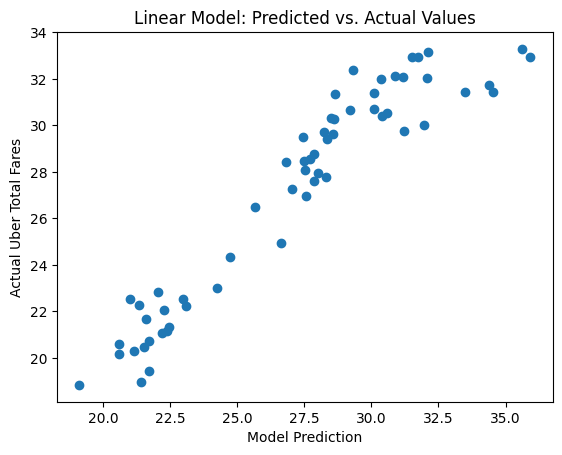

In [54]:
plt.scatter(x=y_pred, y=y)
plt.title('Linear Model: Predicted vs. Actual Values')
plt.ylabel('Actual Uber Total Fares')
plt.xlabel('Model Prediction')
plt.show()